# Data Set Download and Basic Manipulations
Since the model uses both image transformers and text transformers it uses different data sets for these.For image processing, Imagenet and CIFAR10/100 datasets are used. For text processing Wikitext Dataset is used.




## Download CIFAR 10/100 Data

In [ ]:
!pip install numpy matplotlib torch torchvision transformers
!pip install datasets
import torchvision
from torchvision import datasets, transforms

from torchvision import transforms

# Define the transformation: Convert to RGB and Resize all images to 224x224
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.Lambda(lambda x: x.convert("RGB")),  # Convert grayscale to RGB
    transforms.ToTensor()           # Convert image to tensor
])
# Download CIFAR-10
cifar10_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Download CIFAR-100
cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


100%|██████████| 170M/170M [00:08<00:00, 20.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


100%|██████████| 169M/169M [00:08<00:00, 20.3MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


## Download Imagenet Data
Since which Imagenet data is used is not specified, I download IMagenet Data 1000 k from Huggingface. Data is bigger compared CIFAR Data because of that data streaming technique is applied. In data streaming, data is downloaded in smaller chunks and model is trained on them then other chunk is downloaded.

Since model is run while downloding the data, sample run is taken on a simple Neural network.


In [ ]:
from huggingface_hub import login

login()  # This will prompt you to enter your Hugging Face token.

In [ ]:
from datasets import load_dataset

# Load ImageNet dataset in streaming mode
dataset = load_dataset("imagenet-1k", split="train", streaming=True)

# Apply the resize transformation to each image in the dataset
def apply_transform(batch):
    batch["image"] = transform(batch["image"])  # Apply the transform to each image
    return batch

# Apply the transformation using the `map` function
dataset = dataset.map(apply_transform)

In [ ]:
from torch.utils.data import DataLoader, IterableDataset

class HuggingFaceIterableDataset(IterableDataset):
    def __init__(self, hf_dataset):
        self.hf_dataset = hf_dataset

    def __iter__(self):
        return iter(self.hf_dataset)  # Return an iterator over the Hugging Face streaming dataset

In [ ]:
# Wrap the Hugging Face dataset
hf_iterable_dataset = HuggingFaceIterableDataset(dataset)

# Create a DataLoader
loader = DataLoader(hf_iterable_dataset, batch_size=32, shuffle=False)  # Shuffling not directly supported in streaming mode


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple model (example)
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 224 * 224, 1000)  # Assuming ImageNet images resized to 224x224
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    for batch in loader:
        inputs, labels = batch["image"], batch["label"]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 7.022977352142334
Epoch 0, Loss: 131.66065979003906
Epoch 0, Loss: 184.18438720703125
Epoch 0, Loss: 240.0240936279297
Epoch 0, Loss: 216.84181213378906
Epoch 0, Loss: 284.65618896484375
Epoch 0, Loss: 338.02227783203125
Epoch 0, Loss: 329.0938720703125
Epoch 0, Loss: 378.34844970703125
Epoch 0, Loss: 426.6568908691406
Epoch 0, Loss: 413.9710693359375
Epoch 0, Loss: 484.827392578125
Epoch 0, Loss: 439.7859802246094
Epoch 0, Loss: 467.15533447265625
Epoch 0, Loss: 438.31329345703125
Epoch 0, Loss: 480.0920715332031
Epoch 0, Loss: 522.80419921875
Epoch 0, Loss: 493.4233093261719
Epoch 0, Loss: 435.83880615234375
Epoch 0, Loss: 481.9871826171875
Epoch 0, Loss: 437.3219909667969
Epoch 0, Loss: 418.4051513671875
Epoch 0, Loss: 456.6556396484375
Epoch 0, Loss: 497.8081970214844
Epoch 0, Loss: 463.0848083496094
Epoch 0, Loss: 467.2099609375
Epoch 0, Loss: 359.4383850097656
Epoch 0, Loss: 514.5249633789062
Epoch 0, Loss: 580.01171875
Epoch 0, Loss: 430.5486755371094
Epoch 0, Los

KeyboardInterrupt: 

## Download Wikitext Data

In [ ]:

from datasets import load_dataset

# Load the WikiText-103 dataset
dataset_wiki = load_dataset("wikitext", "wikitext-103-v1")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Simple runs for project preparation


### Simulating Incremental Learning (Simplified Model)


This part involves training a toy attention head with diagonal weight matrices.

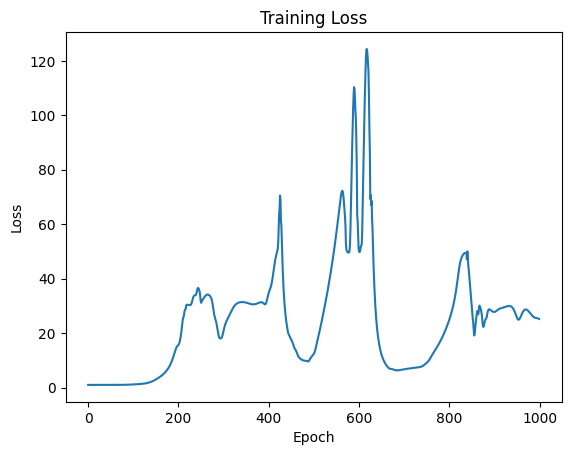

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_tokens = 10
d_model = 50
alpha = 0.01  # Small initialization scale
n_epochs = 1000

# Generate random input data
np.random.seed(42)
X = np.random.randn(n_tokens, d_model)
y = np.random.randn(n_tokens, d_model)

# Initialize weights (diagonal)
w_k = alpha * np.random.randn(d_model)
w_q = alpha * np.random.randn(d_model)

# Attention mechanism with diagonal weights
def attention(X, w_k, w_q):
    scores = X @ np.diag(w_k) @ X.T
    attention = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    return attention @ (X @ np.diag(w_q))

# Training loop
losses = []
for epoch in range(n_epochs):
    # Forward pass
    output = attention(X, w_k, w_q)
    loss = np.mean((output - y) ** 2)
    losses.append(loss)

    # Backward pass (gradient descent)
    grad_w_k = np.sum((output - y)[:, :, None] * X[:, None, :] @ np.diag(w_q), axis=(0, 1))
    grad_w_q = np.sum((output - y).T @ X @ np.diag(w_k), axis=0)

    lr = 0.001  # Learning rate
    w_k -= lr * grad_w_k
    w_q -= lr * grad_w_q

# Plot results
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

### Training Practical Transformers
Use a PyTorch-based Vision Transformer or GPT-2 model from the Hugging Face Transformers library. Train the model and compute the rank of weight updates during training.

In [ ]:
import torch
from transformers import ViTForImageClassification, ViTConfig
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Dataset and transformations
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Vision Transformer
config = ViTConfig(image_size=224, num_labels=10, hidden_size=128, num_attention_heads=4)
model = ViTForImageClassification(config)

# Initialize optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
for epoch in range(5):  # Adjust epochs as needed
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = torch.nn.CrossEntropyLoss()(outputs.logits, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}: Loss = {loss.item()}")

# Analyze rank of weight updates
initial_weights = model.state_dict()
final_weights = model.state_dict()

for name, param in initial_weights.items():
    if "weight" in name and len(param.shape) == 2:  # Only matrix weights
        delta = final_weights[name] - param
        rank = torch.linalg.matrix_rank(delta).item()
        print(f"Rank of weight update for {name}: {rank}")


100%|██████████| 170M/170M [00:04<00:00, 41.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch 1: Loss = 1.5522533655166626
Epoch 2: Loss = 2.2861521244049072
Epoch 3: Loss = 1.4026825428009033
Epoch 4: Loss = 1.2688992023468018
Epoch 5: Loss = 0.9501097202301025
Rank of weight update for vit.encoder.layer.0.attention.attention.query.weight: 0
Rank of weight update for vit.encoder.layer.0.attention.attention.key.weight: 0
Rank of weight update for vit.encoder.layer.0.attention.attention.value.weight: 0
Rank of weight update for vit.encoder.layer.0.attention.output.dense.weight: 0
Rank of weight update for vit.encoder.layer.0.intermediate.dense.weight: 0
Rank of weight update for vit.encoder.layer.0.output.dense.weight: 0
Rank of weight update for vit.encoder.layer.1.attention.attention.query.weight: 0
Rank of weight update for vit.encoder.layer.1.attention.attention.key.weight: 0
Rank of weight update for vit.encoder.layer.1.attention.attention.value.weight: 0
Rank of weight update for vit.encoder.layer.1.attention.output.

### Analyzing Incremental Rank Growth
Use Singular Value Decomposition (SVD) to analyze rank growth at different iterations:

In [ ]:
print(initial_weights.keys())

odict_keys(['vit.embeddings.cls_token', 'vit.embeddings.position_embeddings', 'vit.embeddings.patch_embeddings.projection.weight', 'vit.embeddings.patch_embeddings.projection.bias', 'vit.encoder.layer.0.attention.attention.query.weight', 'vit.encoder.layer.0.attention.attention.query.bias', 'vit.encoder.layer.0.attention.attention.key.weight', 'vit.encoder.layer.0.attention.attention.key.bias', 'vit.encoder.layer.0.attention.attention.value.weight', 'vit.encoder.layer.0.attention.attention.value.bias', 'vit.encoder.layer.0.attention.output.dense.weight', 'vit.encoder.layer.0.attention.output.dense.bias', 'vit.encoder.layer.0.intermediate.dense.weight', 'vit.encoder.layer.0.intermediate.dense.bias', 'vit.encoder.layer.0.output.dense.weight', 'vit.encoder.layer.0.output.dense.bias', 'vit.encoder.layer.0.layernorm_before.weight', 'vit.encoder.layer.0.layernorm_before.bias', 'vit.encoder.layer.0.layernorm_after.weight', 'vit.encoder.layer.0.layernorm_after.bias', 'vit.encoder.layer.1.atten

In [ ]:
def compute_rank(matrix):
    u, s, v = torch.svd(matrix)
    return torch.sum(s > 1e-5).item()  # Non-zero singular values

# Example
delta = final_weights["vit.encoder.layer.0.attention.attention.query.weight"] - initial_weights["vit.encoder.layer.0.attention.attention.query.weight"]
print("Rank of weight difference:", compute_rank(delta))

Rank of weight difference: 0


In [ ]:
for name in initial_weights.keys():
    if "weight" in name and len(initial_weights[name].shape) == 2:  # Only matrix weights
        delta = final_weights[name] - initial_weights[name]
        rank = compute_rank(delta)
        print(f"Rank of weight difference for {name}: {rank}")

Rank of weight difference for vit.encoder.layer.0.attention.attention.query.weight: 0
Rank of weight difference for vit.encoder.layer.0.attention.attention.key.weight: 0
Rank of weight difference for vit.encoder.layer.0.attention.attention.value.weight: 0
Rank of weight difference for vit.encoder.layer.0.attention.output.dense.weight: 0
Rank of weight difference for vit.encoder.layer.0.intermediate.dense.weight: 0
Rank of weight difference for vit.encoder.layer.0.output.dense.weight: 0
Rank of weight difference for vit.encoder.layer.1.attention.attention.query.weight: 0
Rank of weight difference for vit.encoder.layer.1.attention.attention.key.weight: 0
Rank of weight difference for vit.encoder.layer.1.attention.attention.value.weight: 0
Rank of weight difference for vit.encoder.layer.1.attention.output.dense.weight: 0
Rank of weight difference for vit.encoder.layer.1.intermediate.dense.weight: 0
Rank of weight difference for vit.encoder.layer.1.output.dense.weight: 0
Rank of weight dif

### Visualization
Visualize rank evolution during training:

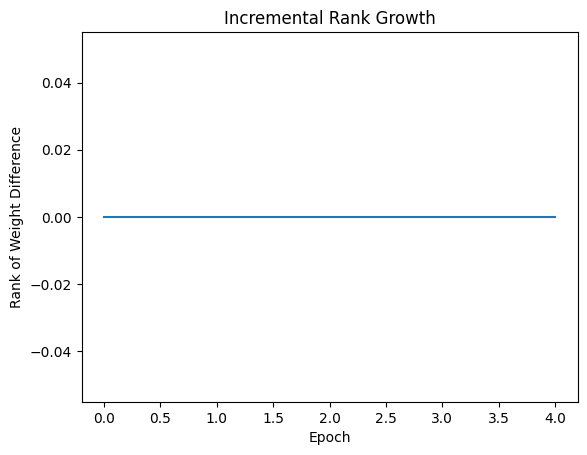

In [ ]:
ranks = []
n_epochs=5
for epoch in range(n_epochs):
    # (Update weights and compute rank for delta here)
    ranks.append(compute_rank(delta))

plt.plot(ranks)
plt.xlabel("Epoch")
plt.ylabel("Rank of Weight Difference")
plt.title("Incremental Rank Growth")
plt.show()

In [ ]:
import torch
from transformers import ViTForImageClassification, ViTConfig
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# CIFAR-10 dataset and transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit ViT input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize to [-1, 1]
])

dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Vision Transformer model
config = ViTConfig(image_size=224, num_labels=10, hidden_size=128, num_attention_heads=4)
model = ViTForImageClassification(config)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Files already downloaded and verified


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
# Initialize optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = torch.nn.CrossEntropyLoss()

# Function to compute singular values
def compute_singular_values(weight):
    u, s, v = torch.svd(weight)
    return s.cpu().detach().numpy()

# Define the layer and parameter names
layer_idx = 0  # Change to the layer index you want to analyze (e.g., 0, 1, 2,...)
key_weight_name = f"vit.encoder.layer.{layer_idx}.attention.attention.key.weight"
query_weight_name = f"vit.encoder.layer.{layer_idx}.attention.attention.query.weight"

# Save initial weights
initial_weights = {
    "key.weight": model.state_dict()[key_weight_name].clone().detach(),
    "query.weight": model.state_dict()[query_weight_name].clone().detach(),
}

# During training, extract current weights
for epoch in range(num_epochs):
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward and backward pass
        outputs = model(images)
        loss = loss_fn(outputs.logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track singular values at specific iterations
        if iteration in iterations_to_track:
            current_key = model.state_dict()[key_weight_name]
            current_query = model.state_dict()[query_weight_name]

            # Compute perturbation
            initial_key = initial_weights["key.weight"]
            initial_query = initial_weights["query.weight"]
            perturbation = (current_key @ current_query.T) - (initial_key @ initial_query.T)

            # Compute and store singular values
            singular_values.append(compute_singular_values(perturbation))


IndexError: list index out of range

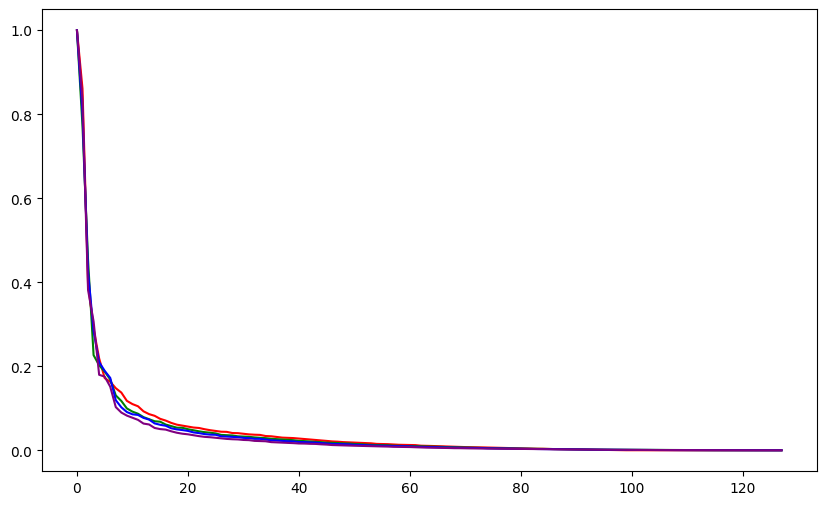

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange']  # Adjust colors if needed

for idx, singulars in enumerate(singular_values):
    plt.plot(singulars / singulars[0], label=f"Iteration {iterations_to_track[idx]}", color=colors[idx])

plt.xlabel("Index of Singular Value")
plt.ylabel("Normalized Magnitude")
plt.title(f"Spectra of Perturbations in W_K W_Q.T for Layer {layer_idx}")
plt.legend()
plt.grid()
plt.show()